# Cloud Classification
---
Identify the type of cloud in the sky using deep transfer learning
___

**Author**: Aman Hussain  
**Email**: email at 'first name' + 'last name' dot com  
**Description**: Research notebook for cloud classification based on the appearance of clouds in the sky
___

## Import Libraries

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

## Configuration

In [35]:
np.random.seed(42)
DATA = Path("../data/")
CLASSES = ['cirrus', 'cumulus', 'stratus']

## Types of Cloud

**Source**: [WW2010 University of Illinois](http://ww2010.atmos.uiuc.edu/(Gh)/guides/mtr/cld/cldtyp/home.rxml)

Clouds are classified into a system that uses Latin words to describe the appearance of clouds as seen by an observer on the ground. The table below summarizes the four principal components of this classification system (Ahrens, 1994).

- cumulus (heap)
- stratus (layer)
- cirrus (curl of hair)
- nimbus (rain)

Further classification identifies clouds by height of cloud base. For example, cloud names containing the prefix "cirr-", as in cirrus clouds, are located at high levels while cloud names with the prefix "alto-", as in altostratus, are found at middle levels. This module introduces several cloud groups. The first three groups are identified based upon their height above the ground. The fourth group consists of vertically developed clouds, while the final group consists of a collection of miscellaneous cloud types. 

## Create Dataset

In [17]:
folder = 'cirrus'
dest = DATA/folder
dest.mkdir(parents=True, exist_ok=True)

In [18]:
download_images('../urls_cirrus.txt', dest)

In [19]:
folder = 'cumulus'
dest = DATA/folder
dest.mkdir(parents=True, exist_ok=True)

In [20]:
download_images('../urls_cumulus.txt', dest)

Error https://image.shutterstock.com/image-photo/blue-sky-cumulus-clouds-that-450w-752448991.jpg HTTPSConnectionPool(host='image.shutterstock.com', port=443): Read timed out. (read timeout=4)


In [21]:
folder = 'stratus'
dest = DATA/folder
dest.mkdir(parents=True, exist_ok=True)

In [22]:
download_images('../urls_stratus.txt', dest)

**Verify all images**

In [32]:
for c in CLASSES:
    print(c)
    verify_images(DATA/c, delete=True)

cirrus


cumulus


stratus


## Load Data

In [27]:
doc(ImageDataBunch.from_folder)

from_folder [source] from_folder ( `path` : PathOrStr , `train` : PathOrStr = `'train'` , `valid` : PathOrStr = `'valid'` , `valid_pct` = `None` , `classes` : Collection [ T_co ]= `None` , `kwargs` : Any ) → ImageDataBunch 
 
 Create from imagenet style dataset in path with train , valid , test subfolders (or provide valid_pct ). 
 Show in docs

In [51]:
data = ImageDataBunch.from_folder(DATA, train=".", valid_pct=0.2, size=224, bs=16)

In [52]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList
y: CategoryList (232 items)
[Category cirrus, Category cirrus, Category cirrus, Category cirrus, Category cirrus]...
Path: ../data
x: ImageItemList (232 items)
[Image (3, 154, 275), Image (3, 657, 960), Image (3, 683, 1024), Image (3, 1167, 1600), Image (3, 401, 600)]...
Path: ../data;

Valid: LabelList
y: CategoryList (57 items)
[Category stratus, Category cirrus, Category stratus, Category cumulus, Category cumulus]...
Path: ../data
x: ImageItemList (57 items)
[Image (3, 682, 1000), Image (3, 280, 195), Image (3, 3024, 3938), Image (3, 410, 615), Image (3, 400, 320)]...
Path: ../data;

Test: None

## Exploratory Data Analysis

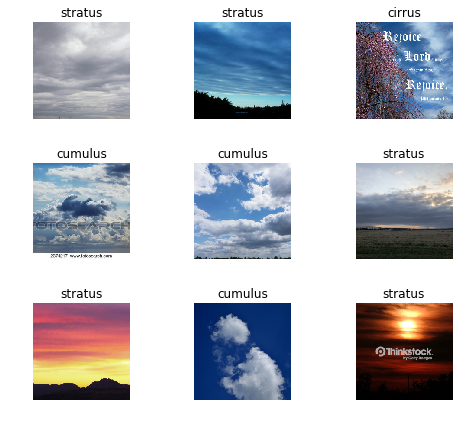

In [53]:
data.show_batch(rows=3, figsize=(7,6))

In [54]:
data.classes

['cirrus', 'cumulus', 'stratus']

In [55]:
data.c

3

In [56]:
data.sanity_check()

In [57]:
len(data.train_ds)

232

In [58]:
len(data.valid_ds)

57

In [60]:
data.batch_size

16

## Train Model: Resnet34 already trained on Imagenet 

In [61]:
doc(create_cnn)

create_cnn [source] create_cnn ( `data` : DataBunch , `arch` : Callable , `cut` : Union [ int , Callable ]= `None` , `pretrained` : bool = `True` , `lin_ftrs` : Optional [ Collection [ int ]]= `None` , `ps` : Floats = `0.5` , `custom_head` : Optional [ Module ]= `None` , `split_on` : Union [ Callable , Collection [ ModuleList ], NoneType ]= `None` , `bn_final` : bool = `False` , `kwargs` : Any ) → Learner 
 
 Build convnet style learners. 
 Show in docs

In [62]:
learner = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/jupyter/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 71711306.77it/s]


In [63]:
print(learner.summary())

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [16, 64, 112, 112]   9408       False     
______________________________________________________________________
BatchNorm2d          [16, 64, 112, 112]   128        True      
______________________________________________________________________
ReLU                 [16, 64, 112, 112]   0          False     
______________________________________________________________________
MaxPool2d            [16, 64, 56, 56]     0          False     
______________________________________________________________________
Conv2d               [16, 64, 56, 56]     36864      False     
______________________________________________________________________
BatchNorm2d          [16, 64, 56, 56]     128        True      
______________________________________________________________________
ReLU                 [16, 64, 56, 56]     0          False     
______________________________________________________________

In [64]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.236267,0.724873,0.280702


Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    se

KeyboardInterrupt: 

**NOTES:** The model seems to have overfit because train_loss has gone below validation_loss

## Save Model

In [25]:
learner.save('stage-1')

## Results

In [16]:
doc(ClassificationInterpretation)

class ClassificationInterpretation [source] ClassificationInterpretation ( `data` : DataBunch , `probs` : Tensor , `y_true` : Tensor , `losses` : Tensor ) 
 
 Interpretation methods for classification models. 
 Show in docs

In [17]:
interp = ClassificationInterpretation.from_learner(learner)

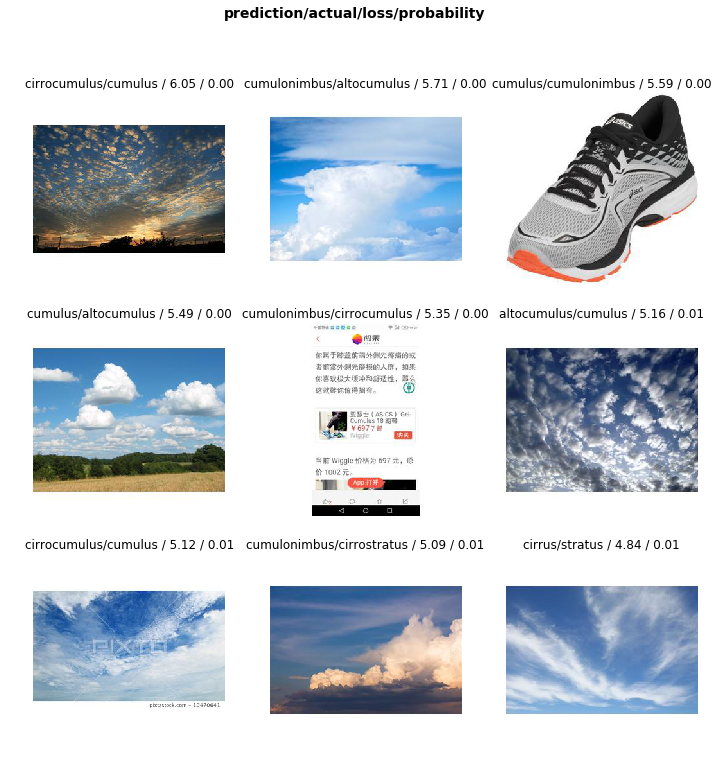

In [21]:
interp.plot_top_losses(9)

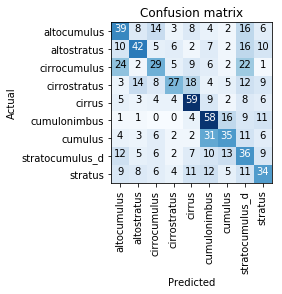

In [22]:
interp.plot_confusion_matrix()

In [24]:
interp.most_confused(min_val=10)

[('cumulus', 'cumulonimbus', 31),
 ('cirrocumulus', 'altocumulus', 24),
 ('cirrocumulus', 'stratocumulus_d', 22),
 ('cirrostratus', 'cirrus', 18),
 ('altocumulus', 'stratocumulus_d', 16),
 ('altostratus', 'stratocumulus_d', 16),
 ('cumulonimbus', 'cumulus', 16),
 ('altocumulus', 'cirrocumulus', 14),
 ('cirrostratus', 'altostratus', 14),
 ('stratocumulus_d', 'cumulus', 13),
 ('cirrostratus', 'stratocumulus_d', 12),
 ('stratocumulus_d', 'altocumulus', 12),
 ('stratus', 'cumulonimbus', 12),
 ('cumulonimbus', 'stratus', 11),
 ('cumulus', 'stratocumulus_d', 11),
 ('stratus', 'cirrus', 11),
 ('stratus', 'stratocumulus_d', 11)]

## Finetune Model

**Train a model from scratch to see the error introduced by transfer learning if any**

In [27]:
learner.unfreeze()

In [ ]:
learner.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate
1,1.710189,1.783073,0.638889


**Finetune model with differential learning rate**

In [35]:
learner.load('stage-1');

In [36]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


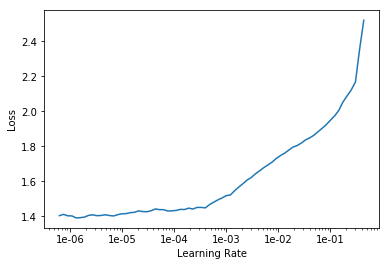

In [37]:
learner.recorder.plot()

**NOTES:** 1e-05 is the best learning rate

In [38]:
learner.unfreeze()

In [39]:
learner.fit_one_cycle(3, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate
1,1.415190,1.651497,0.601111
2,1.385831,1.641656,0.595556
3,1.331880,1.637111,0.603333


**NOTES:** Clear overfitting

## Save Model

In [40]:
learner.save('stage-2')

## Results

In [42]:
interp = ClassificationInterpretation.from_learner(learner)

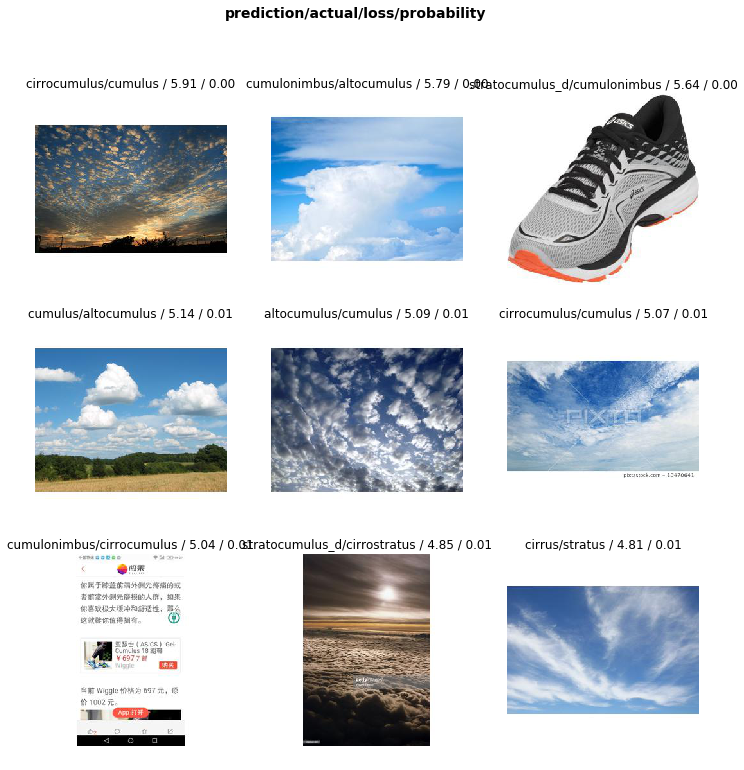

In [44]:
interp.plot_top_losses(9)

**NOTES:**
- All models(untrained, trained on imagenet and finetuned) are overfitting
- Maybe the data needs to cleaned manually.